C:\Users\cite scolaire 78\AppData\Local\Temp\ipykernel_24384\3531781363.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


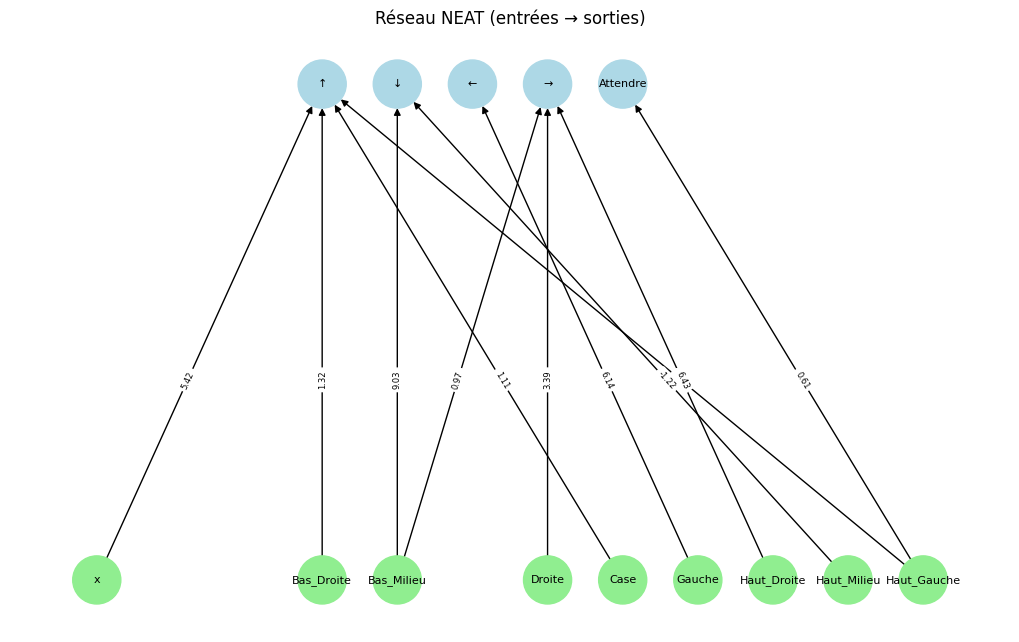

In [1]:
import neat
import pickle
import networkx as nx
import matplotlib.pyplot as plt

def draw_neat_network(genome, config, node_names=None):
 
    G = nx.DiGraph()

    for node_key in genome.nodes:
        G.add_node(node_key)

    for cg in genome.connections.values():
        if cg.enabled:
            src, dst = cg.key
            G.add_edge(src, dst, weight=cg.weight)

    input_nodes = list(config.genome_config.input_keys)
    output_nodes = list(config.genome_config.output_keys)
    hidden_nodes = list(set(genome.nodes.keys()) - set(input_nodes) - set(output_nodes))

    color_map = []
    for node in G.nodes():
        if node in input_nodes:
            color_map.append("lightgreen")
        elif node in output_nodes:
            color_map.append("lightblue")
        else:
            color_map.append("orange")

    def layer_positions(nodes, y, x_start=0):
        """Retourne les positions (x, y) des nœuds d'une même couche"""
        if len(nodes) == 0:
            return {}
        spacing = 2.0
        x_offset = -(len(nodes) - 1) * spacing / 2
        return {n: (x_start + i * spacing + x_offset, y) for i, n in enumerate(sorted(nodes))}

    pos = {}
    pos.update(layer_positions(input_nodes, y=0))
    pos.update(layer_positions(hidden_nodes, y=2))
    pos.update(layer_positions(output_nodes, y=4))

    if node_names is None:
        labels = {n: str(n) for n in G.nodes()}
    else:
        labels = {n: node_names.get(n, str(n)) for n in G.nodes()}

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels,
            node_color=color_map, node_size=1200,
            arrows=True, font_size=8)

    labels_edges = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos,
        edge_labels={k: f"{v:.2f}" for k, v in labels_edges.items()},
        font_size=6, label_pos=0.4)

    plt.title("Réseau NEAT (entrées → sorties)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()



with open("winner.pkl", "rb") as f:
    winner = pickle.load(f)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "config_genomes.txt"
)

node_names = {
    -1: "Haut_Gauche", -2: "Haut_Milieu", -3: "Haut_Droite", -4: "Gauche", -5: "Case", -6: "Droite", -7: "Bas_Gauche", -8: "Bas_Milieu", -9: "Bas_Droite",
    -10: "Énergie", -11: "t", -12: "x", -13: "y",
    
    0: "↑", 1: "↓", 2: "←", 3: "→", 4: "Attendre"
}

draw_neat_network(winner, config, node_names)


In [ ]:
import itertools
n = 7
for n in range(3, 15):
    l = list(itertools.permutations(range(n)))
    m = 0
    for perm in l:
        s = 0
        for i in range(n-1):
            s+= abs(perm[i+1]-perm[i])
        m = max(m,s)
    print(m)


3
7
11
17
23
31
39
49
